# Subject segmentation with K-means
This speculative analysis seeks to segment subjects into clusters based on various combinations of DVs. The dimensionality of the DVs is first reduced usingn data-driven PCA analysis. Once the clusers are defined, they can be compared to exisiting theory-driven categorisations. There are a few potential ways to apply this analysis:
1. use CBCL DVs and examine compositional differences between low depression / high anxiety and high depression / low anxiety groups (as illustrated in this notebook)
2. use CBCL DVs and compare to existing dimensional categorisation which uses DSM to convert CBCL to diagnoses (e.g. data-driven nosology, maybe)
3. use CBCL DVs and compare to existing clinician binary diagnoses (e.g. as per the original method, can run this alongside the bayes factor analysis)
4. use with other DVs (not CBCL, e.g. early temperament, emotional regulation, problem solving, UPSS) and compare to existing dimensional categorisation

In [ ]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# magic word for producing visualizations in notebook
%matplotlib inline

In [4]:
raw_data = '../raw/'
derived_data = '../derived/'
version_old = '20211207'
version_new = date.today().strftime('%Y%m%d')

In [38]:
data = pd.read_csv(f'{derived_data}{version_old}/data_clean_iqr_{version_old}.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)

In [39]:
data_loaded = data.copy()
data = data.query('time == 0').reset_index(drop=True)

In [166]:
with open('cbcl.txt') as f:
    cbcl = f.readlines()

cbcl = [i.strip('\n') for i in cbcl]

In [42]:
data = data[cbcl]

In [49]:
X = data.copy()

# Reduce dimensionality of CBCL DVs using PCA

In [152]:
pca = PCA()
x_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'Explained Variance Per Principal Component')

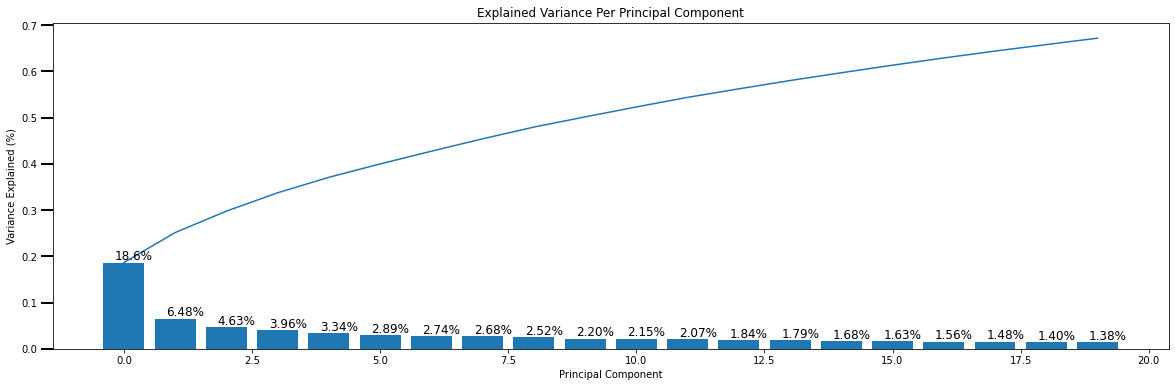

In [155]:
num_components= 20 #len(pca.explained_variance_ratio_)[:20]
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_[:20]
 
plt.figure(figsize=(20, 6))
ax = plt.subplot(111)
cumvals = np.cumsum(vals)
ax.bar(ind, vals)
ax.plot(ind, cumvals)
for i in range(num_components):
    ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)
 
ax.set_xlabel("Principal Component")
ax.set_ylabel("Variance Explained (%)")
plt.title('Explained Variance Per Principal Component')

In [53]:
pca.explained_variance_ratio_

array([1.86533507e-01, 6.48325872e-02, 4.63255216e-02, 3.96914897e-02,
       3.34413389e-02, 2.89414211e-02, 2.74695960e-02, 2.68715759e-02,
       2.52955381e-02, 2.20739665e-02, 2.15032382e-02, 2.07116898e-02,
       1.84217701e-02, 1.79668459e-02, 1.68157162e-02, 1.63371112e-02,
       1.56621262e-02, 1.48764684e-02, 1.40361641e-02, 1.38867206e-02,
       1.30936937e-02, 1.28137746e-02, 1.24600716e-02, 1.18709624e-02,
       1.16454395e-02, 1.11648576e-02, 1.07145494e-02, 1.03534685e-02,
       1.02572973e-02, 9.59032721e-03, 9.09941565e-03, 9.02717184e-03,
       8.65361994e-03, 8.05358273e-03, 8.04159762e-03, 7.83373788e-03,
       7.66248259e-03, 7.26301749e-03, 7.08159185e-03, 6.80114208e-03,
       6.17821755e-03, 5.88161491e-03, 5.76713581e-03, 5.50544488e-03,
       5.39877951e-03, 5.02748821e-03, 5.01521858e-03, 4.90350180e-03,
       4.87097859e-03, 4.49224727e-03, 4.33529546e-03, 4.15355801e-03,
       4.02291513e-03, 3.78033460e-03, 3.64013200e-03, 3.51355470e-03,
      

In [58]:
pca = PCA(n_components=4)
x_pca = pca.fit_transform(X)

In [59]:
def plot_component(pca, number):
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X.columns)
    comp = components.iloc[number,:].sort_values(ascending=False)

    plt.figure(figsize = (20,5))
    plt.title(f"Weights of each feature in component {number+1}")
    # Plot the feature weights as a function of the components
    comp.plot(kind = 'bar')

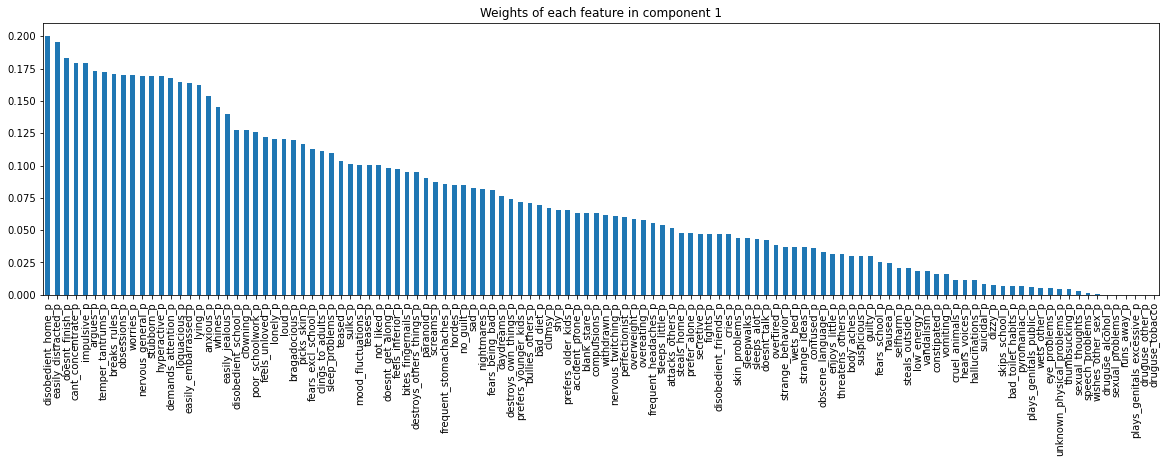

In [126]:
plot_component(pca, 0)

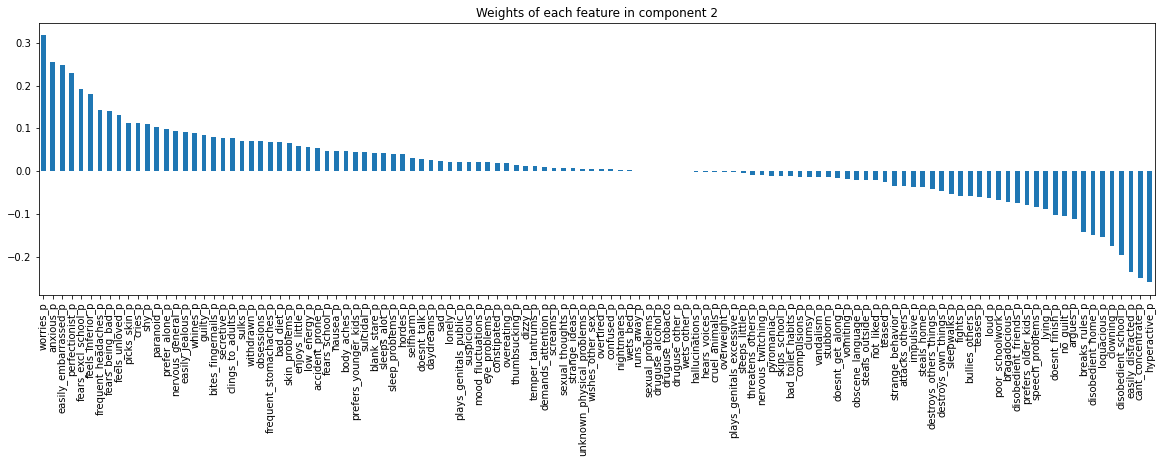

In [129]:
plot_component(pca, 1)

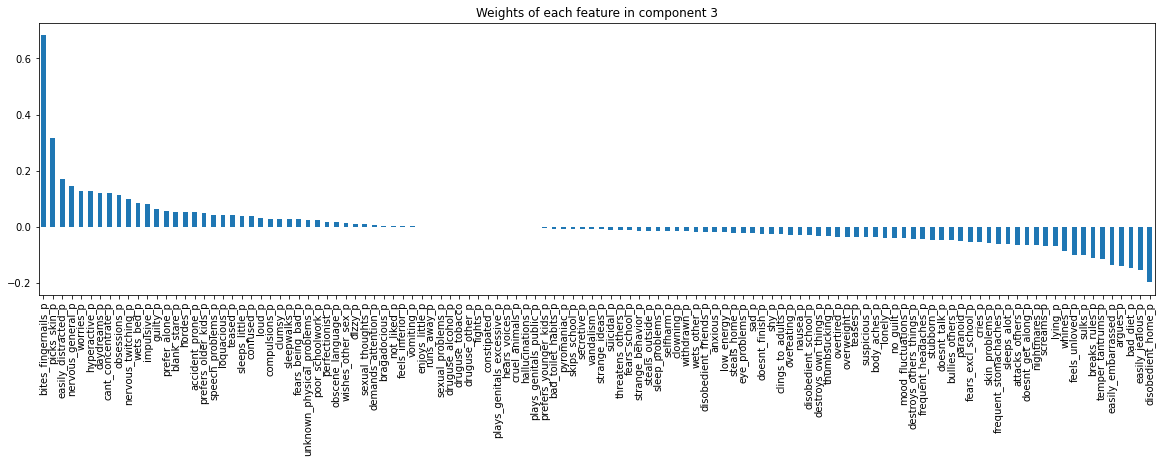

In [130]:
plot_component(pca, 2)

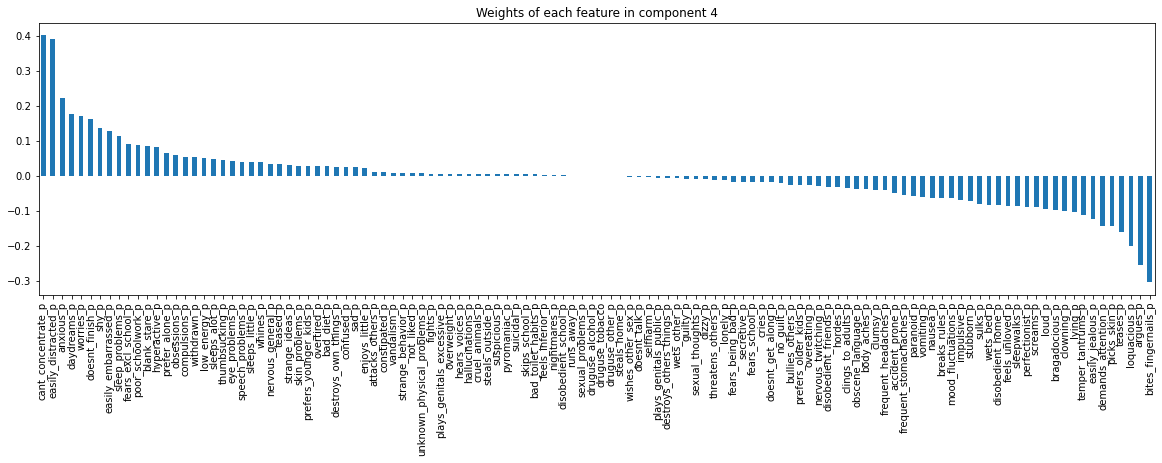

In [131]:
plot_component(pca, 3)

# K-means clustering

In [65]:
# Over a number of different cluster counts...
def k_means_score(data, clusters):
    kmeans = KMeans(n_clusters=clusters)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)

    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

In [74]:
clusters = [i+1 for i in range(15)]
scores = []
for i in clusters:
    score = round(k_means_score(X, i), 0)
    scores.append(score)

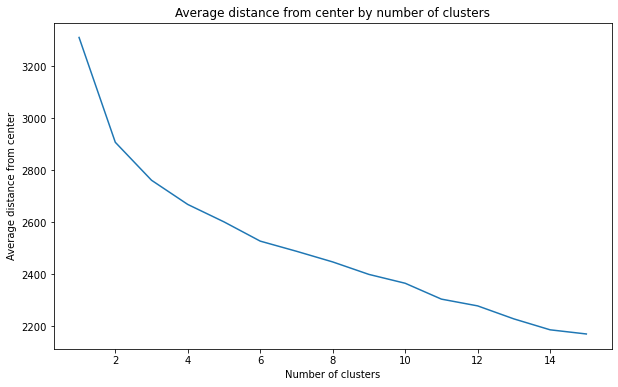

In [75]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.figure(figsize=(10, 6))
plt.xlabel("Number of clusters")
plt.ylabel("Average distance from center")
plt.title('Average distance from center by number of clusters')
plt.plot(clusters, scores)

In [111]:
kmeans = KMeans(n_clusters=10)
model = kmeans.fit(x_pca)
clusters = model.predict(x_pca)

In [137]:
highdep_lowanx = data_loaded.copy()
highdep_lowanx = highdep_lowanx.query('time == 0').reset_index(drop=True)
#highdep_lowanx = highdep_lowanx.iloc[,:]
highdep_lowanx = highdep_lowanx.query('depanx_c == "highdep_lowanx"').reset_index(drop=True)
highdep_lowanx = highdep_lowanx[cbcl]

In [141]:
highdep_lowanx = data_loaded.copy()
highdep_lowanx = highdep_lowanx.query('time == 0').reset_index(drop=True)
#highdep_lowanx = highdep_lowanx.iloc[,:]
highdep_lowanx = highdep_lowanx.query('depanx_c == "lowdep_highanx"').reset_index(drop=True)
highdep_lowanx = highdep_lowanx[cbcl]

In [142]:

# Reduce dimensionality of data
x_pca_cust = pca.transform(highdep_lowanx)

# Obtain cluster prediction
clusters_cust = model.predict(x_pca_cust)

In [124]:
data = pd.DataFrame(x_pca, columns = ['1', '2', '3', '4'])

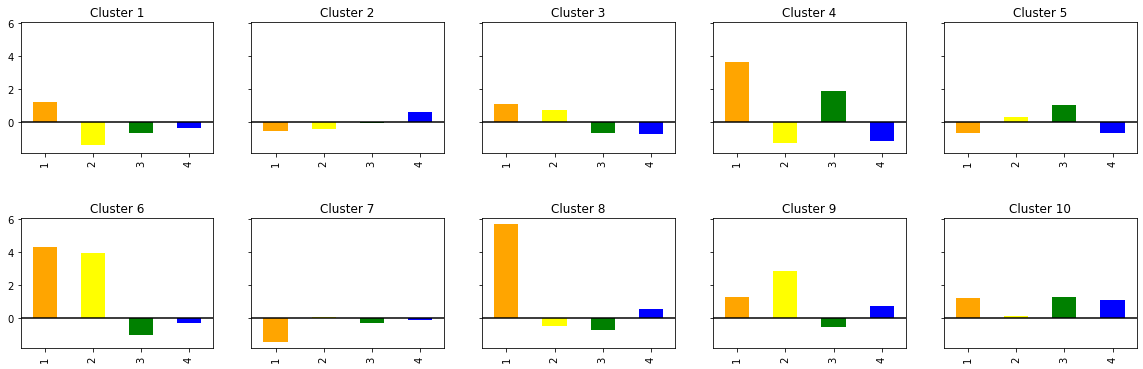

In [156]:
fig, axs = plt.subplots(2, 5, sharey=True, figsize=(20, 6))
plt.subplots_adjust(hspace=0.5)

for i in range(10):
    row = i // 5
    col = i % 5
    ax = axs[row,col]
    ax.axhline(color='black')
    ax.title.set_text(f"Cluster {i+1}")
    data[clusters == i].mean().plot(kind='bar', ax=ax, color=['orange', 'yellow', 'green', 'blue'])
    

In [96]:
x_pca.shape

(200, 4)

/Users/clarewalker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clarewalker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

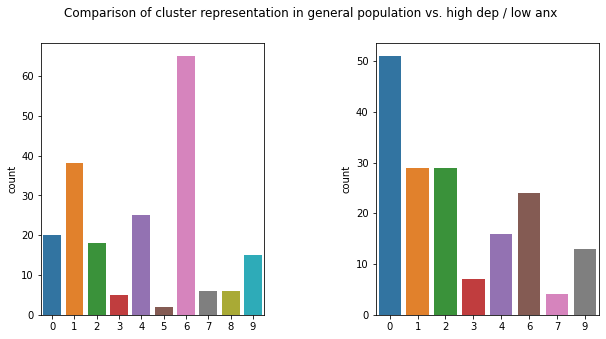

In [140]:
fig, axs = plt.subplots(1, 2, sharex=False, figsize=(10, 5))
fig.suptitle("Comparison of cluster representation in general population vs. high dep / low anx")
fig.subplots_adjust(wspace=0.5)

# Gender
sns.countplot(clusters, ax=axs[0])
sns.countplot(clusters_cust, ax=axs[1])

/Users/clarewalker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/clarewalker/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

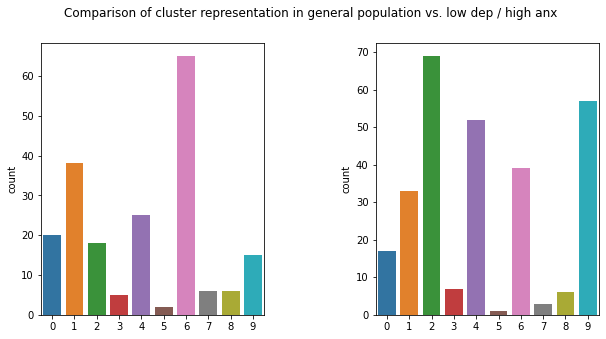

In [143]:
fig, axs = plt.subplots(1, 2, sharex=False, figsize=(10, 5))
fig.suptitle("Comparison of cluster representation in general population vs. low dep / high anx")
fig.subplots_adjust(wspace=0.5)

sns.countplot(clusters, ax=axs[0])
sns.countplot(clusters_cust, ax=axs[1])